<a href="https://colab.research.google.com/github/sudohui/cctb/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

url = 'https://raw.githubusercontent.com/sudohui/cctb/refs/heads/main/titanic.csv'
# data = pd.read_csv('/content/titanic.csv')
data = pd.read_csv(url)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
missing_values = titanic.isnull().sum() / len(titanic) * 100
print(missing_values)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [7]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

if 'deck' in titanic.columns:
    titanic.drop(columns=['deck'], inplace=True)

print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


<ipython-input-7-c23a09dad9da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-7-c23a09dad9da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [23]:
print("Numerical Summary:")
print(titanic.describe())
print("\nCategorical Summary:")
print(titanic.describe(include=['object', 'category']))

Numerical Summary:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Categorical Summary:
         sex embarked  class  who deck  embark_town alive
count    891      889    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    no
freq     577      644    

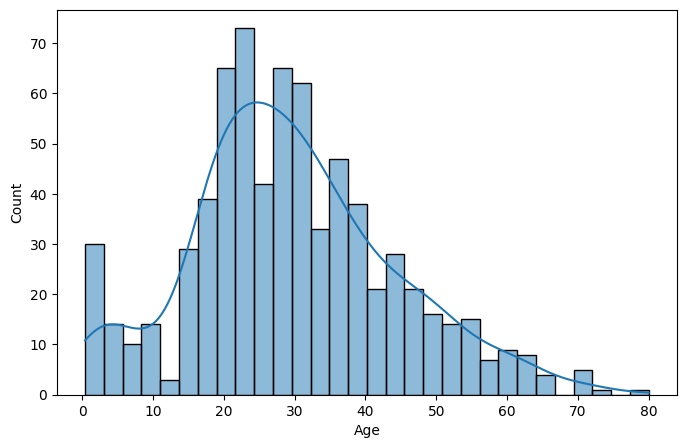

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

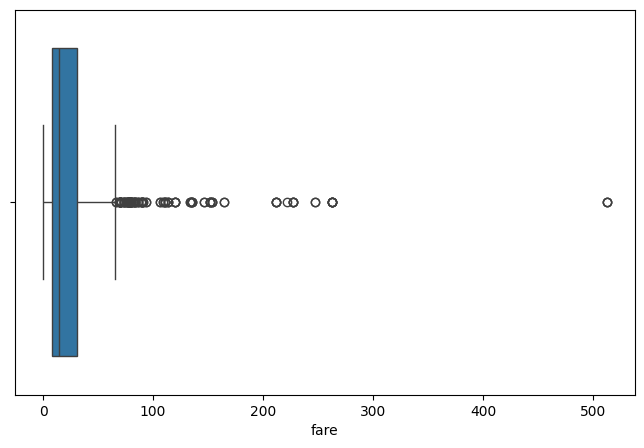

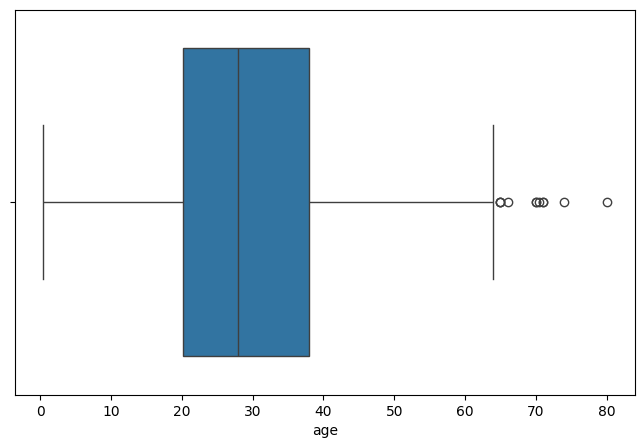

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic["fare"])
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic["age"])
plt.show()

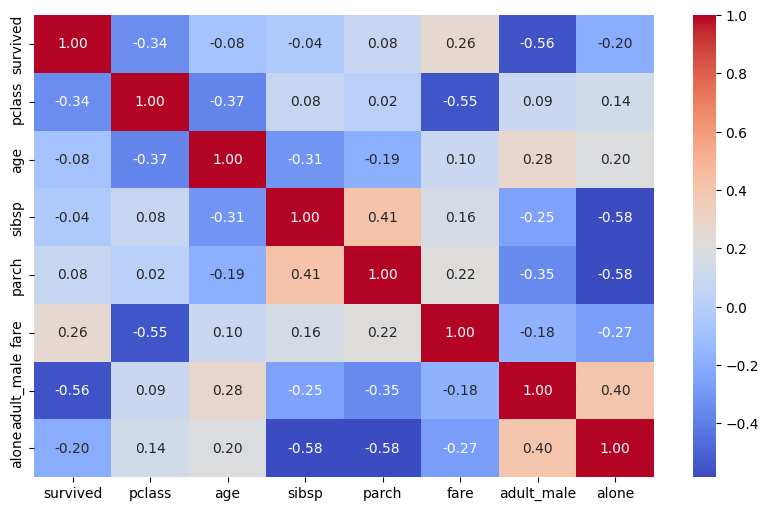

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [13]:
avg_fare_per_class = titanic.groupby("class")["fare"].mean()
print(avg_fare_per_class)

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


<ipython-input-13-8175aee6b599>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_per_class = titanic.groupby("class")["fare"].mean()


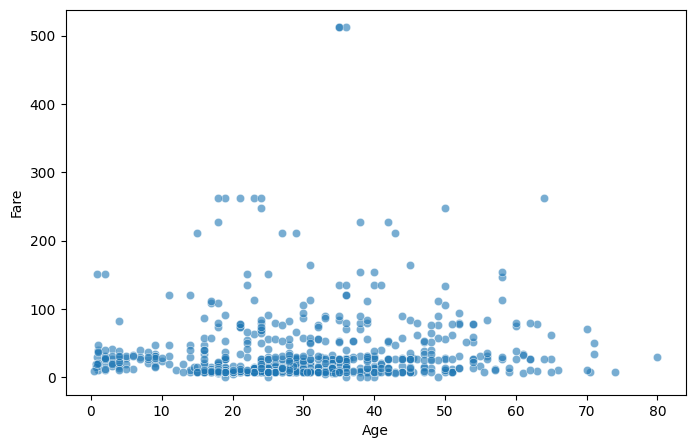

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=titanic["age"], y=titanic["fare"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()